# Missing Values - Feature Engineering

# What are the different tyes of Missing Data?
#### 1. Missing completely at random

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### 2.Missing data not at random(MNAR): systematic missing values

In [6]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##Find the percentage of the null values
df['cabin_null'].mean()

0.7710437710437711

In [7]:
df['cabin_null']

0      1
1      0
2      1
3      0
4      1
5      1
6      0
7      1
8      1
9      1
10     0
11     0
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     0
22     1
23     0
24     1
25     1
26     1
27     0
28     1
29     1
      ..
861    1
862    0
863    1
864    1
865    1
866    1
867    0
868    1
869    1
870    1
871    0
872    0
873    1
874    1
875    1
876    1
877    1
878    1
879    0
880    1
881    1
882    1
883    1
884    1
885    1
886    1
887    0
888    1
889    0
890    1
Name: cabin_null, Length: 891, dtype: int32

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [10]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

 #### 3. Missing At Random(MAR)

In [11]:
### All the techniques of handling, missing values

1. mean/median/mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

SyntaxError: invalid syntax (<ipython-input-11-2d0c46833781>, line 3)

### Mean/Median/Mode imputation
when should we apply? Mean/Median imputation has the assumption that the data are missing completely at random(MCAR).
We solve this by replacing the NAN with the most Frequent occurence of the variables

In [12]:
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
## Let's go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [14]:
def impute_nan(df, variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [15]:
median = df.Age.median()
median

28.0

In [16]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [17]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

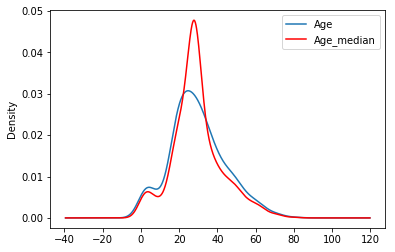

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages and Disadvantages of Mean/Median Imputation

### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

### Dis-advantages
1. change or distortion in the original variance
2. impact on correlation

#### Random Sample Imputation
Aim: Random sample imputation consists of taking random observations from the dataset and we use this observation to replace the nan values

when should it be used? It assumes that the data are missing completely at random(MCAR)

In [20]:
import pandas as pd
df = pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [21]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [22]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [23]:
df['Age'].isnull().sum()

177

In [24]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
595    36.00
637    31.00
54     65.00
456    65.00
110    47.00
287    22.00
315    26.00
691     4.00
811    39.00
861    21.00
15     55.00
239    33.00
644     0.75
394    24.00
795    39.00
131    20.00
346    40.00
9      14.00
477    29.00
606    30.00
469     0.75
325    36.00
72     21.00
724    27.00
40     40.00
       ...  
396    31.00
452    30.00
395    22.00
882    22.00
821    27.00
314    43.00
622    20.00
204    18.00
60     22.00
731    11.00
81     29.00
676    24.50
433    17.00
378    20.00
174    56.00
624    21.00
642     2.00
157    30.00
427    19.00
698    49.00
179    36.00
24      8.00
630    80.00
458    50.00
49     18.00
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [25]:
df[df['Age'].isnull()].index #It gives index of all null values

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [26]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    ##It will have the random sample to fill na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample

In [27]:
median = df.Age.median()

In [28]:
median

28.0

In [29]:
impute_nan(df,"Age",median)

In [30]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

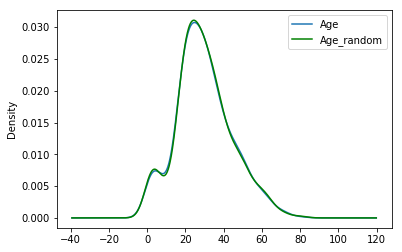

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax) #or df.Age.plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages
1. Easy to implement
2. There is less distortion in variance
#### Dis-advantages
1. Every situation randomness wont work

#### Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [33]:
df=pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [35]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [36]:
df.Age.median()

28.0

In [38]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [40]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance of the missing values

#### Dis-Advantages
1.Creating additional Features(Curse of Dimensionality)

### End of Distribution imputation

In [43]:
import numpy as np
import pandas as pd
df = pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


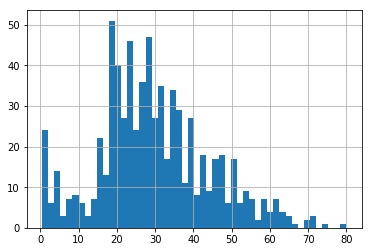

In [44]:
df.Age.hist(bins=50)

In [45]:
df.Age.mean()

29.69911764705882

In [46]:
df.Age.std()

14.526497332334044

In [49]:
extreme=df.Age.mean()+3*df.Age.std()

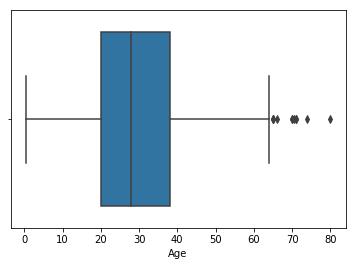

In [50]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [51]:
def impute_nan(df, variable, median, extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [52]:
impute_nan(df, 'Age', median, extreme)

In [54]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


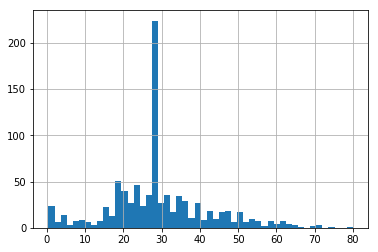

In [55]:
df['Age'].hist(bins=50)

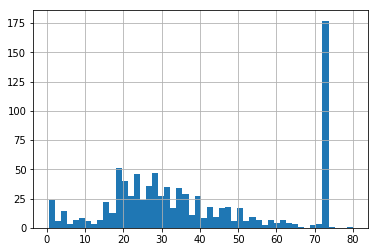

In [56]:
df['Age_end_distribution'].hist(bins=50)

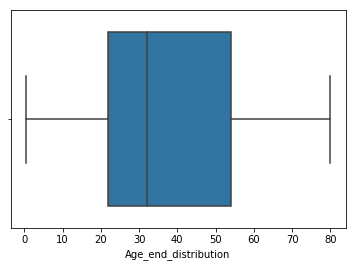

In [57]:
sns.boxplot('Age_end_distribution',data=df)

#### Advantages
1. Easy to implement
2. Capture the importance of missingness if there is one

#### Dis-Advantages
1. Distorts the original distribution of the variable
2. If the number of NA is big, it will mask true outliers in the distribution
3. If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent feature engineering

### Arbitrary Value Imputation

This technique was derived from kaggle competition

It consists of replacing NAN by an arbitrary value

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
def impute_nan(df, variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

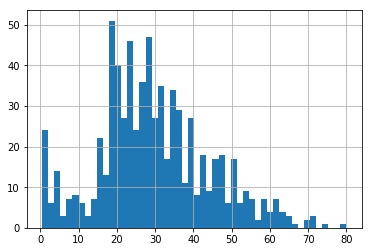

In [8]:
df['Age'].hist(bins=50)

### Advantages

1.Easy to implement
2.Capture the importance of missingness if there is one

### Dis-Advantages

1.Distorts the original distribution of the variable
2.If missingness is not important,it may mask the predictive power of the original variable by distorting its distribution
3.Hard to decide which value to use